In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import datetime
from datetime import datetime as d
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='iframe'
%matplotlib inline

In [2]:
df = pd.read_csv("dataset/spotify_replaced.csv")

In [3]:
df

,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,category_name
0,087fGGq27BXXpxKAlbBwNM,Rhythm Is A Dancer - 7' Edit,0.27300,0.794,225882,0.7450,0.000414,9.0,0.1430,-11.367,0.0,0.0370,124.249,4.0,0.7060,32,relax
1,0CsM8VGDi38kusMv3pxyj1,True - Single Edit,0.45900,0.742,329146,0.5330,0.148000,0.0,0.0640,-9.098,1.0,0.0288,97.395,4.0,0.3910,73,relax
2,0DiWol3AO6WpXZgp0goxAV,One More Time,0.01940,0.613,320357,0.6970,0.000000,2.0,0.3320,-8.618,1.0,0.1330,122.746,4.0,0.4760,80,relax
3,0LzeivEHO16a8eBQGlpVkE,Love Shack - Edit; 2019 Remaster,0.11000,0.704,262586,0.8280,0.000000,5.0,0.7470,-7.304,0.0,0.0514,133.496,4.0,0.8660,61,relax
4,0MHXrqn909p0LRTPsNsGEi,Move on Up - Single Edit,0.41700,0.538,165789,0.9690,0.001540,11.0,0.1190,-5.626,0.0,0.0906,138.652,4.0,0.9280,73,relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29040,2riw7lzJhEHDNDNQKj3ml9,Sojourner Truth,0.96800,0.264,330146,0.0783,0.251000,8.0,0.0722,-19.087,1.0,0.0457,82.021,4.0,0.0634,22,NaN
29041,6T572wD8zgOLOlB9TzxUmh,Pool Party,0.02930,0.543,238000,0.6120,0.653000,0.0,0.1070,-7.832,0.0,0.0318,172.035,4.0,0.2770,48,NaN
29042,6lrRIfQDcikJ5y5DtyZPuJ,Can't Let You Go (feat. Mike Shorey & Lil' Mo),0.23100,0.646,223973,0.6000,0.000000,9.0,0.0794,-6.569,1.0,0.4580,192.082,4.0,0.8110,68,NaN
29043,7ITCyjmVcBWKAe38V8epGU,Swaggin' At The Partment,0.00183,0.562,124667,0.9310,0.884000,9.0,0.5240,-5.377,1.0,0.0743,92.532,4.0,0.4670,11,NaN


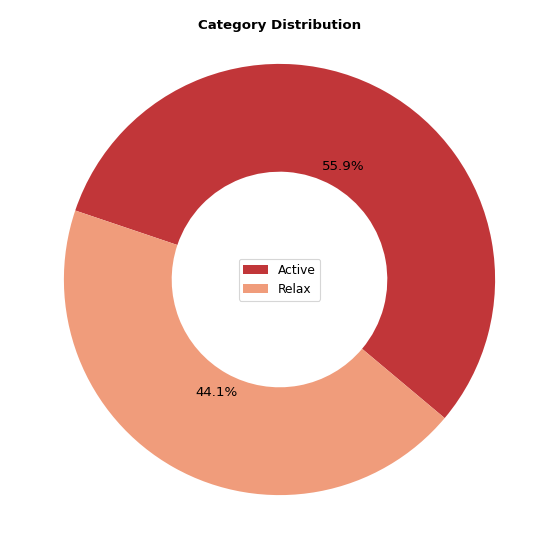

In [4]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.set_context("paper")

category_counts = df["category_name"].value_counts()
wedges, autotexts, _ = ax.pie(category_counts, colors=sns.color_palette("RdBu"), labels=['', ''], wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%')

legend_labels = ["Active", "Relax"]
ax.legend(wedges, legend_labels, loc="upper center", bbox_to_anchor=(0.5, 0.55))

plt.setp(autotexts, size=10)
plt.title("Category Distribution", y=0.95, weight="bold")
plt.savefig("img/category_pie_chart.svg", dpi=300)
plt.show()

In [5]:
df.head(10)

,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,category_name
0,087fGGq27BXXpxKAlbBwNM,Rhythm Is A Dancer - 7' Edit,0.27300,0.794,225882,0.745,0.000414,9.0,0.1430,-11.367,0.0,0.0370,124.249,4.0,0.706,32,relax
1,0CsM8VGDi38kusMv3pxyj1,True - Single Edit,0.45900,0.742,329146,0.533,0.148000,0.0,0.0640,-9.098,1.0,0.0288,97.395,4.0,0.391,73,relax
2,0DiWol3AO6WpXZgp0goxAV,One More Time,0.01940,0.613,320357,0.697,0.000000,2.0,0.3320,-8.618,1.0,0.1330,122.746,4.0,0.476,80,relax
3,0LzeivEHO16a8eBQGlpVkE,Love Shack - Edit; 2019 Remaster,0.11000,0.704,262586,0.828,0.000000,5.0,0.7470,-7.304,0.0,0.0514,133.496,4.0,0.866,61,relax
4,0MHXrqn909p0LRTPsNsGEi,Move on Up - Single Edit,0.41700,0.538,165789,0.969,0.001540,11.0,0.1190,-5.626,0.0,0.0906,138.652,4.0,0.928,73,relax
5,0TVV2gFROJaB3kIZyCUvIY,Rather Be (feat. Jess Glynne),0.16200,0.799,227833,0.586,0.000002,11.0,0.1930,-6.735,1.0,0.0377,120.970,4.0,0.549,64,relax
6,0VGyBqMFAJFlSAikuqMUfa,You Can't Hurry Love - 2016 Remaster,0.03340,0.620,174080,0.937,0.000000,7.0,0.1040,-4.584,1.0,0.0312,97.705,4.0,0.750,46,relax
7,0Z9UkcT1pnrmLciUJPcMMS,Gold - 2003 Remaster,0.25000,0.724,290720,0.802,0.001600,10.0,0.3420,-6.117,0.0,0.0337,143.116,4.0,0.729,66,relax
8,0Zt9fqRK58Y0onY1VwaKp7,She Drives Me Crazy,0.16400,0.796,218906,0.693,0.000018,2.0,0.0408,-6.020,1.0,0.0413,108.800,4.0,0.954,0,relax
9,0gmbgwZ8iqyMPmXefof8Yf,How You Remind Me,0.00135,0.446,223840,0.764,0.000000,10.0,0.0990,-5.042,1.0,0.0330,172.094,4.0,0.543,83,relax


In [6]:
df.tail(10)

,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,category_name
29035,41EL2wsqBkrmtokkNhspOe,Sonata for Flute and Piano: I. Allegro giocoso,0.991000,0.393,278693,0.0946,0.910,7.0,0.0777,-24.878,1.0,0.0380,147.092,4.0,0.1430,28,NaN
29036,0xIr3jg76a7aQUaTyonlMr,Life’s A Bitch,0.000482,0.655,200000,0.9230,0.796,6.0,0.3050,-5.473,1.0,0.0344,137.987,4.0,0.5010,27,NaN
29037,6lQzNJLgIn4uEK4NUMUcjv,Dance with My Ghost (feat. Elderbrook),0.002210,0.701,246944,0.8020,0.396,10.0,0.0887,-7.887,0.0,0.0407,123.008,4.0,0.1540,57,NaN
29038,7pT6WSg4PCt4mr5ZFyUfsF,If We Have Each Other,0.698000,0.656,181522,0.5770,0.000,10.0,0.2960,-5.566,0.0,0.0802,173.094,4.0,0.8610,82,NaN
29039,39j6QzHqCa4G6lCwoJDQYE,bad note,0.004610,0.719,166771,0.6810,0.000,11.0,0.2430,-6.933,0.0,0.0591,127.101,4.0,0.7630,52,NaN
29040,2riw7lzJhEHDNDNQKj3ml9,Sojourner Truth,0.968000,0.264,330146,0.0783,0.251,8.0,0.0722,-19.087,1.0,0.0457,82.021,4.0,0.0634,22,NaN
29041,6T572wD8zgOLOlB9TzxUmh,Pool Party,0.029300,0.543,238000,0.6120,0.653,0.0,0.1070,-7.832,0.0,0.0318,172.035,4.0,0.2770,48,NaN
29042,6lrRIfQDcikJ5y5DtyZPuJ,Can't Let You Go (feat. Mike Shorey & Lil' Mo),0.231000,0.646,223973,0.6000,0.000,9.0,0.0794,-6.569,1.0,0.4580,192.082,4.0,0.8110,68,NaN
29043,7ITCyjmVcBWKAe38V8epGU,Swaggin' At The Partment,0.001830,0.562,124667,0.9310,0.884,9.0,0.5240,-5.377,1.0,0.0743,92.532,4.0,0.4670,11,NaN
29044,42F16X6WRCAFwPyRY4nH7O,Dou,0.982000,0.540,369626,0.1670,0.833,1.0,0.0643,-15.765,0.0,0.0393,93.990,3.0,0.3940,41,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29045 entries, 0 to 29044
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                29045 non-null  object 
 1   name              29045 non-null  object 
 2   acousticness      28901 non-null  float64
 3   danceability      28901 non-null  float64
 4   duration_ms       29045 non-null  int64  
 5   energy            28901 non-null  float64
 6   instrumentalness  28901 non-null  float64
 7   key               28901 non-null  float64
 8   liveness          28901 non-null  float64
 9   loudness          28901 non-null  float64
 10  mode              28901 non-null  float64
 11  speechiness       28901 non-null  float64
 12  tempo             28901 non-null  float64
 13  time_signature    28901 non-null  float64
 14  valence           28901 non-null  float64
 15  popularity        29045 non-null  int64  
 16  category_name     23409 non-null  object

In [8]:
df.columns

Index(['id', 'name', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity',
       'category_name'],
      dtype='object')

In [9]:
df.reset_index(inplace = True)
df

,index,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,category_name
0,0,087fGGq27BXXpxKAlbBwNM,Rhythm Is A Dancer - 7' Edit,0.27300,0.794,225882,0.7450,0.000414,9.0,0.1430,-11.367,0.0,0.0370,124.249,4.0,0.7060,32,relax
1,1,0CsM8VGDi38kusMv3pxyj1,True - Single Edit,0.45900,0.742,329146,0.5330,0.148000,0.0,0.0640,-9.098,1.0,0.0288,97.395,4.0,0.3910,73,relax
2,2,0DiWol3AO6WpXZgp0goxAV,One More Time,0.01940,0.613,320357,0.6970,0.000000,2.0,0.3320,-8.618,1.0,0.1330,122.746,4.0,0.4760,80,relax
3,3,0LzeivEHO16a8eBQGlpVkE,Love Shack - Edit; 2019 Remaster,0.11000,0.704,262586,0.8280,0.000000,5.0,0.7470,-7.304,0.0,0.0514,133.496,4.0,0.8660,61,relax
4,4,0MHXrqn909p0LRTPsNsGEi,Move on Up - Single Edit,0.41700,0.538,165789,0.9690,0.001540,11.0,0.1190,-5.626,0.0,0.0906,138.652,4.0,0.9280,73,relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29040,29040,2riw7lzJhEHDNDNQKj3ml9,Sojourner Truth,0.96800,0.264,330146,0.0783,0.251000,8.0,0.0722,-19.087,1.0,0.0457,82.021,4.0,0.0634,22,NaN
29041,29041,6T572wD8zgOLOlB9TzxUmh,Pool Party,0.02930,0.543,238000,0.6120,0.653000,0.0,0.1070,-7.832,0.0,0.0318,172.035,4.0,0.2770,48,NaN
29042,29042,6lrRIfQDcikJ5y5DtyZPuJ,Can't Let You Go (feat. Mike Shorey & Lil' Mo),0.23100,0.646,223973,0.6000,0.000000,9.0,0.0794,-6.569,1.0,0.4580,192.082,4.0,0.8110,68,NaN
29043,29043,7ITCyjmVcBWKAe38V8epGU,Swaggin' At The Partment,0.00183,0.562,124667,0.9310,0.884000,9.0,0.5240,-5.377,1.0,0.0743,92.532,4.0,0.4670,11,NaN


In [10]:
df.isnull().sum()

index                  0
id                     0
name                   0
acousticness         144
danceability         144
duration_ms            0
energy               144
instrumentalness     144
key                  144
liveness             144
loudness             144
mode                 144
speechiness          144
tempo                144
time_signature       144
valence              144
popularity             0
category_name       5636
dtype: int64

In [11]:
df.nunique()

index               29045
id                  19236
name                17690
acousticness         3208
danceability         1096
duration_ms         15745
energy               2153
instrumentalness     4124
key                    12
liveness             1491
loudness            12466
mode                    2
speechiness          1197
tempo               15138
time_signature          5
valence              1757
popularity            101
category_name           2
dtype: int64

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29040    False
29041    False
29042    False
29043    False
29044    False
Length: 29045, dtype: bool

In [13]:
df.count()

index               29045
id                  29045
name                29045
acousticness        28901
danceability        28901
duration_ms         29045
energy              28901
instrumentalness    28901
key                 28901
liveness            28901
loudness            28901
mode                28901
speechiness         28901
tempo               28901
time_signature      28901
valence             28901
popularity          29045
category_name       23409
dtype: int64

In [14]:
df.duplicated(subset=["id", "name"]).sum()

9809

In [15]:
df = df.drop_duplicates(subset=["id", "name"])

In [16]:
df

,index,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,category_name
0,0,087fGGq27BXXpxKAlbBwNM,Rhythm Is A Dancer - 7' Edit,0.27300,0.794,225882,0.7450,0.000414,9.0,0.1430,-11.367,0.0,0.0370,124.249,4.0,0.7060,32,relax
1,1,0CsM8VGDi38kusMv3pxyj1,True - Single Edit,0.45900,0.742,329146,0.5330,0.148000,0.0,0.0640,-9.098,1.0,0.0288,97.395,4.0,0.3910,73,relax
2,2,0DiWol3AO6WpXZgp0goxAV,One More Time,0.01940,0.613,320357,0.6970,0.000000,2.0,0.3320,-8.618,1.0,0.1330,122.746,4.0,0.4760,80,relax
3,3,0LzeivEHO16a8eBQGlpVkE,Love Shack - Edit; 2019 Remaster,0.11000,0.704,262586,0.8280,0.000000,5.0,0.7470,-7.304,0.0,0.0514,133.496,4.0,0.8660,61,relax
4,4,0MHXrqn909p0LRTPsNsGEi,Move on Up - Single Edit,0.41700,0.538,165789,0.9690,0.001540,11.0,0.1190,-5.626,0.0,0.0906,138.652,4.0,0.9280,73,relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29040,29040,2riw7lzJhEHDNDNQKj3ml9,Sojourner Truth,0.96800,0.264,330146,0.0783,0.251000,8.0,0.0722,-19.087,1.0,0.0457,82.021,4.0,0.0634,22,NaN
29041,29041,6T572wD8zgOLOlB9TzxUmh,Pool Party,0.02930,0.543,238000,0.6120,0.653000,0.0,0.1070,-7.832,0.0,0.0318,172.035,4.0,0.2770,48,NaN
29042,29042,6lrRIfQDcikJ5y5DtyZPuJ,Can't Let You Go (feat. Mike Shorey & Lil' Mo),0.23100,0.646,223973,0.6000,0.000000,9.0,0.0794,-6.569,1.0,0.4580,192.082,4.0,0.8110,68,NaN
29043,29043,7ITCyjmVcBWKAe38V8epGU,Swaggin' At The Partment,0.00183,0.562,124667,0.9310,0.884000,9.0,0.5240,-5.377,1.0,0.0743,92.532,4.0,0.4670,11,NaN


In [17]:
df = df.loc[:, ~df.columns.str.contains("index", "level_0")]
df

,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,category_name
0,087fGGq27BXXpxKAlbBwNM,Rhythm Is A Dancer - 7' Edit,0.27300,0.794,225882,0.7450,0.000414,9.0,0.1430,-11.367,0.0,0.0370,124.249,4.0,0.7060,32,relax
1,0CsM8VGDi38kusMv3pxyj1,True - Single Edit,0.45900,0.742,329146,0.5330,0.148000,0.0,0.0640,-9.098,1.0,0.0288,97.395,4.0,0.3910,73,relax
2,0DiWol3AO6WpXZgp0goxAV,One More Time,0.01940,0.613,320357,0.6970,0.000000,2.0,0.3320,-8.618,1.0,0.1330,122.746,4.0,0.4760,80,relax
3,0LzeivEHO16a8eBQGlpVkE,Love Shack - Edit; 2019 Remaster,0.11000,0.704,262586,0.8280,0.000000,5.0,0.7470,-7.304,0.0,0.0514,133.496,4.0,0.8660,61,relax
4,0MHXrqn909p0LRTPsNsGEi,Move on Up - Single Edit,0.41700,0.538,165789,0.9690,0.001540,11.0,0.1190,-5.626,0.0,0.0906,138.652,4.0,0.9280,73,relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29040,2riw7lzJhEHDNDNQKj3ml9,Sojourner Truth,0.96800,0.264,330146,0.0783,0.251000,8.0,0.0722,-19.087,1.0,0.0457,82.021,4.0,0.0634,22,NaN
29041,6T572wD8zgOLOlB9TzxUmh,Pool Party,0.02930,0.543,238000,0.6120,0.653000,0.0,0.1070,-7.832,0.0,0.0318,172.035,4.0,0.2770,48,NaN
29042,6lrRIfQDcikJ5y5DtyZPuJ,Can't Let You Go (feat. Mike Shorey & Lil' Mo),0.23100,0.646,223973,0.6000,0.000000,9.0,0.0794,-6.569,1.0,0.4580,192.082,4.0,0.8110,68,NaN
29043,7ITCyjmVcBWKAe38V8epGU,Swaggin' At The Partment,0.00183,0.562,124667,0.9310,0.884000,9.0,0.5240,-5.377,1.0,0.0743,92.532,4.0,0.4670,11,NaN


In [18]:
df.isnull().sum()

id                     0
name                   0
acousticness          75
danceability          75
duration_ms            0
energy                75
instrumentalness      75
key                   75
liveness              75
loudness              75
mode                  75
speechiness           75
tempo                 75
time_signature        75
valence               75
popularity             0
category_name       3914
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,19161.0,0.426226,0.382762,0.00000,0.046600,0.31000,0.8530,0.996
danceability,19161.0,0.548220,0.204319,0.00000,0.416000,0.58000,0.7050,0.982
duration_ms,19236.0,216144.168538,85564.175247,41500.00000,165671.000000,201458.00000,243603.2500,1792000.000
energy,19161.0,0.514990,0.300412,0.00002,0.246000,0.56200,0.7670,1.000
instrumentalness,19161.0,0.304239,0.400211,0.00000,0.000003,0.00348,0.8120,1.000
key,19161.0,5.268462,3.545212,0.00000,2.000000,5.00000,8.0000,11.000
liveness,19161.0,0.177412,0.152742,0.01130,0.097000,0.11500,0.1950,0.993
loudness,19161.0,-12.205751,8.711406,-49.33700,-15.449000,-9.00300,-6.1800,1.318
mode,19161.0,0.570012,0.495087,0.00000,0.000000,1.00000,1.0000,1.000
speechiness,19161.0,0.076436,0.078561,0.00000,0.037000,0.04710,0.0747,0.929


In [20]:
df["category_name"].value_counts()

category_name
active    7863
relax     7459
Name: count, dtype: int64

In [21]:
df = df.dropna(subset=["category_name"])
df

,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,category_name
0,087fGGq27BXXpxKAlbBwNM,Rhythm Is A Dancer - 7' Edit,0.27300,0.794,225882,0.745,0.000414,9.0,0.1430,-11.367,0.0,0.0370,124.249,4.0,0.706,32,relax
1,0CsM8VGDi38kusMv3pxyj1,True - Single Edit,0.45900,0.742,329146,0.533,0.148000,0.0,0.0640,-9.098,1.0,0.0288,97.395,4.0,0.391,73,relax
2,0DiWol3AO6WpXZgp0goxAV,One More Time,0.01940,0.613,320357,0.697,0.000000,2.0,0.3320,-8.618,1.0,0.1330,122.746,4.0,0.476,80,relax
3,0LzeivEHO16a8eBQGlpVkE,Love Shack - Edit; 2019 Remaster,0.11000,0.704,262586,0.828,0.000000,5.0,0.7470,-7.304,0.0,0.0514,133.496,4.0,0.866,61,relax
4,0MHXrqn909p0LRTPsNsGEi,Move on Up - Single Edit,0.41700,0.538,165789,0.969,0.001540,11.0,0.1190,-5.626,0.0,0.0906,138.652,4.0,0.928,73,relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28562,771FSpGTjawBDlkxfYabfu,989 (Cxngxvxr Remix),0.01040,0.771,217577,0.762,0.000000,6.0,0.1010,-7.114,0.0,0.0397,134.987,4.0,0.342,9,relax
28563,7CwNr65kKOdBBJoO1rxmv3,Bir Kere (feat. Min Taka),0.37400,0.391,307086,0.431,0.002020,4.0,0.6760,-10.271,1.0,0.0412,140.188,4.0,0.143,12,relax
28564,7kRDhovX1yWnDdeW5htuQf,Nokta,0.00867,0.487,293120,0.885,0.693000,1.0,0.2620,-7.350,0.0,0.0459,119.931,4.0,0.394,16,relax
28565,7nt8WpOWy7EnZVBX0cFrrJ,Sessiz Sakin,0.31900,0.892,210456,0.531,0.000003,4.0,0.0954,-9.005,0.0,0.0806,120.019,4.0,0.545,14,relax


In [22]:
df.isnull().sum()

id                   0
name                 0
acousticness        75
danceability        75
duration_ms          0
energy              75
instrumentalness    75
key                 75
liveness            75
loudness            75
mode                75
speechiness         75
tempo               75
time_signature      75
valence             75
popularity           0
category_name        0
dtype: int64

In [23]:
df = df.dropna(subset=["acousticness"])
df

,id,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,category_name
0,087fGGq27BXXpxKAlbBwNM,Rhythm Is A Dancer - 7' Edit,0.27300,0.794,225882,0.745,0.000414,9.0,0.1430,-11.367,0.0,0.0370,124.249,4.0,0.706,32,relax
1,0CsM8VGDi38kusMv3pxyj1,True - Single Edit,0.45900,0.742,329146,0.533,0.148000,0.0,0.0640,-9.098,1.0,0.0288,97.395,4.0,0.391,73,relax
2,0DiWol3AO6WpXZgp0goxAV,One More Time,0.01940,0.613,320357,0.697,0.000000,2.0,0.3320,-8.618,1.0,0.1330,122.746,4.0,0.476,80,relax
3,0LzeivEHO16a8eBQGlpVkE,Love Shack - Edit; 2019 Remaster,0.11000,0.704,262586,0.828,0.000000,5.0,0.7470,-7.304,0.0,0.0514,133.496,4.0,0.866,61,relax
4,0MHXrqn909p0LRTPsNsGEi,Move on Up - Single Edit,0.41700,0.538,165789,0.969,0.001540,11.0,0.1190,-5.626,0.0,0.0906,138.652,4.0,0.928,73,relax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28562,771FSpGTjawBDlkxfYabfu,989 (Cxngxvxr Remix),0.01040,0.771,217577,0.762,0.000000,6.0,0.1010,-7.114,0.0,0.0397,134.987,4.0,0.342,9,relax
28563,7CwNr65kKOdBBJoO1rxmv3,Bir Kere (feat. Min Taka),0.37400,0.391,307086,0.431,0.002020,4.0,0.6760,-10.271,1.0,0.0412,140.188,4.0,0.143,12,relax
28564,7kRDhovX1yWnDdeW5htuQf,Nokta,0.00867,0.487,293120,0.885,0.693000,1.0,0.2620,-7.350,0.0,0.0459,119.931,4.0,0.394,16,relax
28565,7nt8WpOWy7EnZVBX0cFrrJ,Sessiz Sakin,0.31900,0.892,210456,0.531,0.000003,4.0,0.0954,-9.005,0.0,0.0806,120.019,4.0,0.545,14,relax


In [24]:
df.isnull().sum()

id                  0
name                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
category_name       0
dtype: int64

In [25]:
df["category_name"].value_counts()

category_name
active    7861
relax     7386
Name: count, dtype: int64

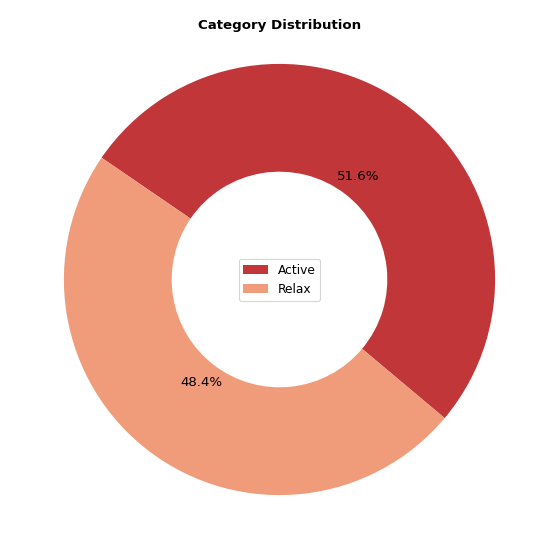

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.set_context("paper")

category_counts = df["category_name"].value_counts()
wedges, autotexts, _ = ax.pie(category_counts, colors=sns.color_palette("RdBu"), labels=['', ''], wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%')

legend_labels = ["Active", "Relax"]
ax.legend(wedges, legend_labels, loc="upper center", bbox_to_anchor=(0.5, 0.55))

plt.setp(autotexts, size=10)
plt.title("Category Distribution", y=0.95, weight="bold")
plt.savefig("img/category_pie_chart.svg", dpi=300)
plt.show()

In [27]:
df_without_string_column = df.drop(["category_name","name","id"], axis=1)
corr_matrix = df_without_string_column.corr()

In [28]:
corr_matrix

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
acousticness,1.000000,-0.477568,-0.100733,-0.821908,0.472940,-0.051263,-0.174947,-0.713356,0.124382,-0.168659,-0.260132,-0.212925,-0.385743,-0.149601
danceability,-0.477568,1.000000,0.004521,0.431476,-0.444485,0.059168,-0.152093,0.650873,-0.141555,0.222800,0.137834,0.258765,0.590685,0.126990
duration_ms,-0.100733,0.004521,1.000000,0.082216,-0.047705,-0.009025,-0.061513,0.110244,-0.014631,-0.106672,0.040457,0.040781,-0.033435,-0.131726
energy,-0.821908,0.431476,0.082216,1.000000,-0.466335,0.066886,0.296671,0.760927,-0.148923,0.165529,0.281190,0.205346,0.427939,0.134181
instrumentalness,0.472940,-0.444485,-0.047705,-0.466335,1.000000,-0.038919,-0.007637,-0.684676,0.115771,-0.171056,-0.218185,-0.186443,-0.451735,-0.208188
key,-0.051263,0.059168,-0.009025,0.066886,-0.038919,1.000000,0.006324,0.070049,-0.169876,0.034014,0.022262,0.020244,0.059179,-0.008538
liveness,-0.174947,-0.152093,-0.061513,0.296671,-0.007637,0.006324,1.000000,0.045983,-0.026102,0.085514,-0.015655,-0.027583,-0.065507,0.026207
loudness,-0.713356,0.650873,0.110244,0.760927,-0.684676,0.070049,0.045983,1.000000,-0.162902,0.151463,0.297592,0.249278,0.516293,0.148121
mode,0.124382,-0.141555,-0.014631,-0.148923,0.115771,-0.169876,-0.026102,-0.162902,1.000000,-0.041480,-0.038244,-0.057876,-0.093212,0.042538
speechiness,-0.168659,0.222800,-0.106672,0.165529,-0.171056,0.034014,0.085514,0.151463,-0.041480,1.000000,0.095762,0.061809,0.143286,0.073438


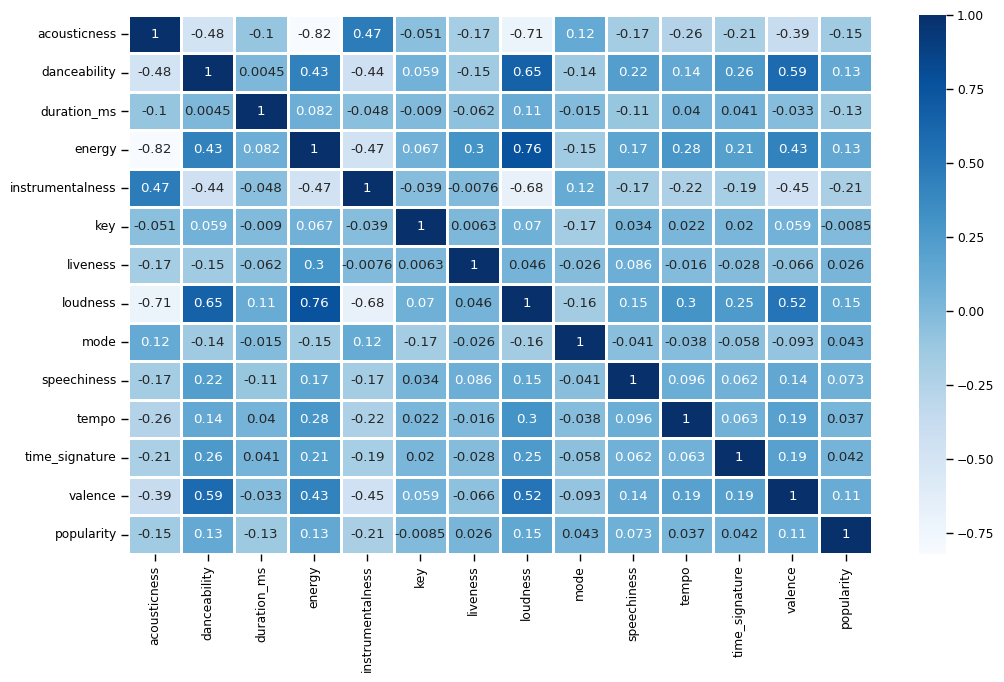

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap="Blues", annot=True, linewidths=1) 
plt.show()

In [30]:
df.to_csv("dataset/spotify_clear_data.csv", index = False)

---